<a href="https://colab.research.google.com/github/FredArgoX/ChaoticTest_DataX/blob/main/ChaoticTest_PolyRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Polynomial Regression

In [41]:
# Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [30]:
# Define feature (X) and target(y)
X = 6 * np.random.rand(200, 1) - 3
y = (0.8 * X**2) + (0.9 * X) + 2 + np.random.randn(200,1)

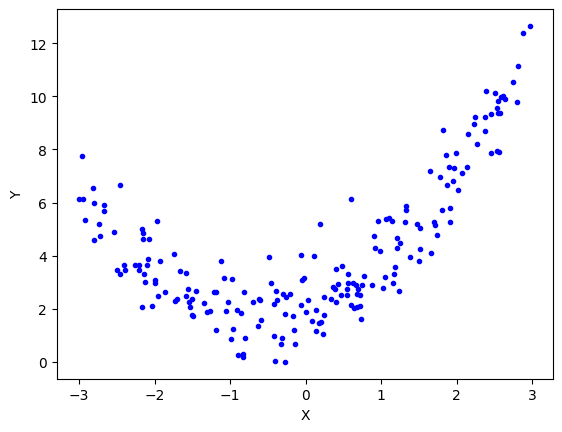

In [31]:
# Visualize y(X)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
# Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
# Simple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.25717533446838203


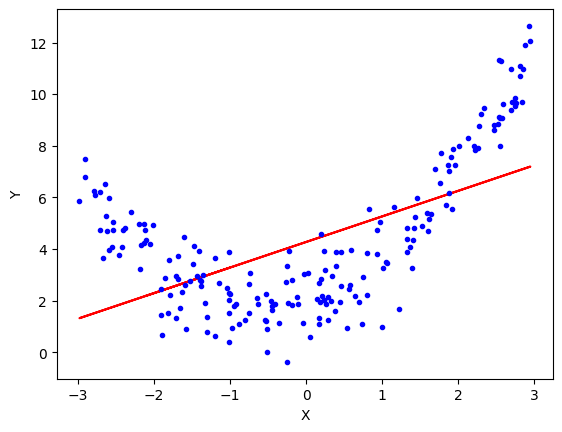

In [7]:
# Visualize Linear regression
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
# As Linear regression is not a fit, let's try Polynomial Regression

# Applying polynomial regression
# Degree chosen: 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply lienar regression to transformed X
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred = lr.predict(X_test_poly)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.8675441943599023


In [9]:
lr.coef_

array([[0.        , 0.88139535, 0.80295669]])

In [10]:
lr.intercept_

array([2.01238026])

$\hat{y} \approx 2.012 + 0.881X + 0.803X^2$

<ipython-input-27-8fe56a36101d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equation_plot_points.append(float(y))


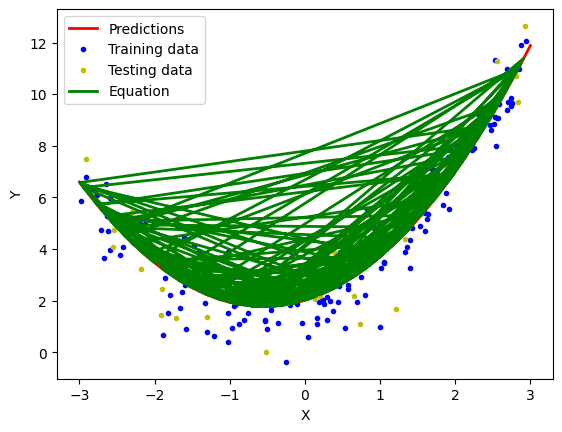

In [27]:
# NOT OK
# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????

# Visualize polynomial regression
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# ------------------------------------------------------------
#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X:
  y = lr.intercept_[0] + (lr.coef_[0][1]*x_point) + (lr.coef_[0][2]*x_point**2)
  equation_plot_points.append(float(y))
# ------------------------------------------------------------

plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training data')
plt.plot(X_test, y_test, 'y.', label='Testing data')

plt.plot(X, equation_plot_points, 'g-', linewidth=2, label='Equation')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????
# ??????????????????????????????????????????????????????????????????????????????

In [53]:
# YES
X_list = []
for x in X:
  X_list.append(x[0])

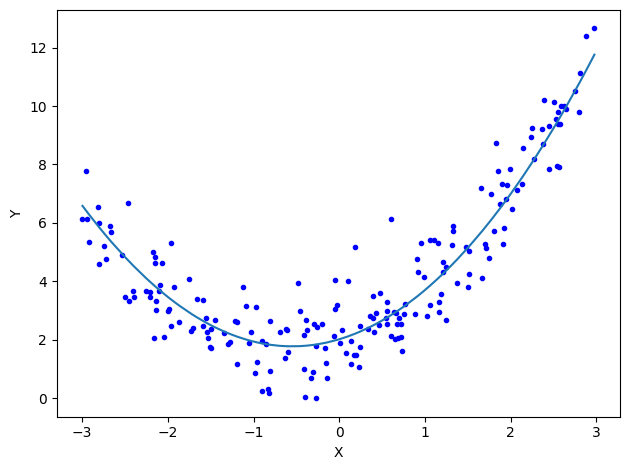

In [56]:
plt.plot(X_list, y, 'b.')




#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X_list:
  yp = float(lr.intercept_[0]) + (float(lr.coef_[0][1])*x_point) + (float(lr.coef_[0][2])*x_point**2)
  equation_plot_points.append(float(yp))

equation_plot_points

#plt.plot(X, equation_plot_points, 'g.')
data = pd.DataFrame({'X': X_list, 'equation_plot_points': equation_plot_points})
sns.lineplot(x=X_list, y=equation_plot_points, data=data)




plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()